# Library&Package Import

In [1]:
import pandas as pd
import numpy as np

## Export the dataset:

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## Normalization:

In [3]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.00000000e+00, 7.61159687e-02, 1.31202967e-01, ...,
        5.55309735e-02, 1.95236236e-02, 0.00000000e+00],
       [7.71545405e-05, 1.24896457e-01, 1.47998691e-01, ...,
        5.99557522e-02, 2.65521281e-02, 0.00000000e+00],
       [1.54309081e-04, 9.08421537e-02, 2.37757662e-01, ...,
        8.65044248e-02, 0.00000000e+00, 1.34957826e-02],
       ...,
       [9.99845691e-01, 6.54855039e-02, 3.62198713e-01, ...,
        7.87610619e-02, 4.64662241e-02, 1.89034677e-01],
       [9.99922845e-01, 8.08559595e-02, 2.21180063e-01, ...,
        2.19026549e-02, 3.08473253e-02, 1.46204311e-02],
       [1.00000000e+00, 8.18223654e-02, 4.06151162e-01, ...,
        3.45132743e-02, 4.45138618e-02, 2.02530459e-01]])

## PCA:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.31288497, 0.24063741, 0.05713359, 0.05096038, 0.03300728,
       0.02894237, 0.02829893, 0.01768085, 0.01717259, 0.01310798])

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

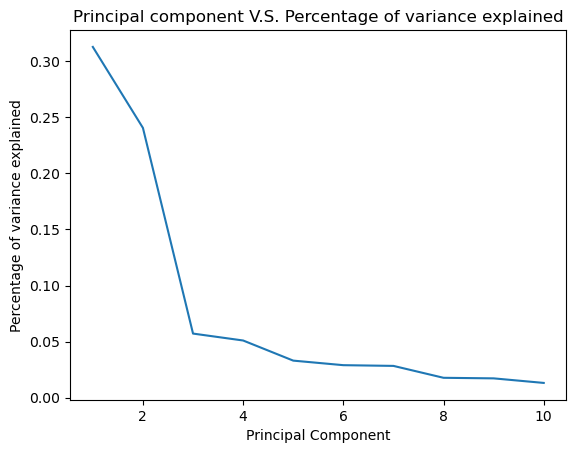

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

## Data split:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 10) (2593, 10) (10369,) (2593,)


## Cross validation:

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
default_params = {'algorithm':'auto','p':2,'metric':'minkowski'}
knn_model = KNeighborsClassifier(**default_params)
cv_params = {'weights':['uniform','distance'],'n_neighbors':np.linspace(1, 10, 10, dtype=int),'leaf_size':np.linspace(1, 10, 10, dtype=int)}
cv = GridSearchCV(knn_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
cv.fit(x_train,y_train) 

print('Best params: ', cv.best_params_)
print('Best scores: ', cv.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params:  {'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}
Best scores:  0.9938279323496617


## Best model:

In [8]:
best_params = {'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}
best_model = KNeighborsClassifier(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 0, 2], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='micro')
recall = recall_score(y_test, y_pred1, average='micro')
f1 = f1_score(y_test, y_pred1, average='micro')

print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_score: ',f1)

accuracy_score:  0.9934438873891246
precision_score:  0.9934438873891246
recall_score:  0.9934438873891246
f1_score:  0.9934438873891246


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[1837    2    0]
 [   4  572    5]
 [   4    2  167]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1839
           1       0.99      0.98      0.99       581
           2       0.97      0.97      0.97       173

    accuracy                           0.99      2593
   macro avg       0.99      0.98      0.98      2593
weighted avg       0.99      0.99      0.99      2593

